## image classify

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1)/255.0 # 깊이 추가
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1))) # 합성곱층 추가

In [3]:
model.add(keras.layers.MaxPooling2D(2)) # 풀링 층 추가

In [4]:
# 두번째 합성곱층-풀링층 생성
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same')) # 필터 64개 지정
model.add(keras.layers.MaxPooling2D(2)) # (2,2)풀링

In [5]:
# 3차원 특성맵 펼치기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

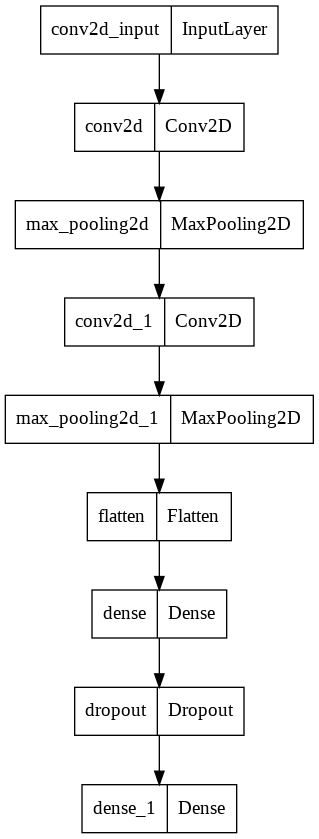

In [7]:
keras.utils.plot_model(model) # 층의 구성

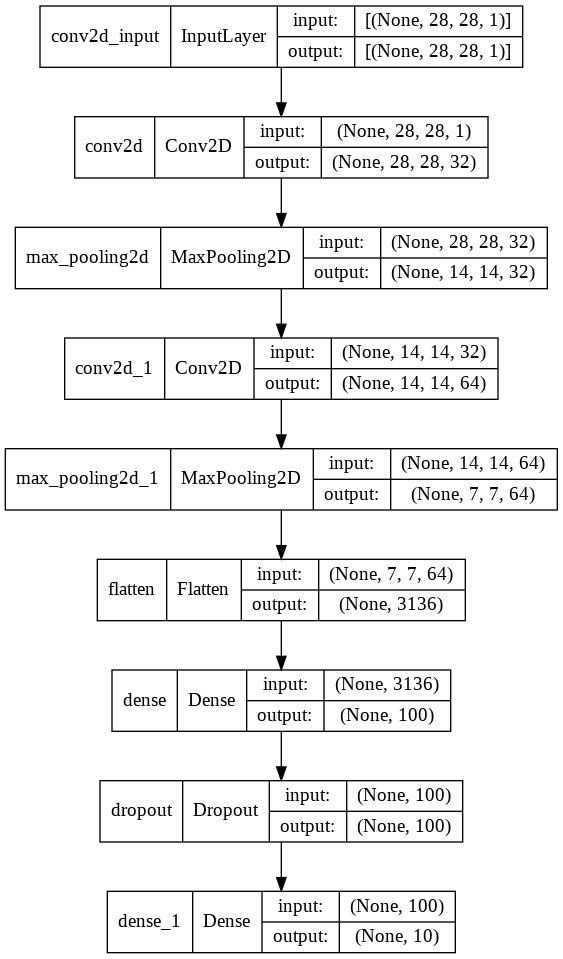

In [8]:
keras.utils.plot_model(model,show_shapes=True) # 입출력 크기 표시

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True) # 조기종료
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 81s 53ms/step - loss: 0.5332 - accuracy: 0.8092 - val_loss: 0.3294 - val_accuracy: 0.8787
Epoch 2/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.3494 - accuracy: 0.8767 - val_loss: 0.2822 - val_accuracy: 0.8944
Epoch 3/20
1500/1500 [==============================] - 70s 47ms/step - loss: 0.3006 - accuracy: 0.8910 - val_loss: 0.2706 - val_accuracy: 0.8989
Epoch 4/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2668 - accuracy: 0.9043 - val_loss: 0.2481 - val_accuracy: 0.9068
Epoch 5/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2419 - accuracy: 0.9107 - val_loss: 0.2288 - val_accuracy: 0.9147
Epoch 6/20
1500/1500 [==============================] - 71s 47ms/step - loss: 0.2204 - accuracy: 0.9191 - val_loss: 0.2257 - val_accuracy: 0.9177
Epoch 7/20
1500/1500 [==============================] - 87s 58ms/step - loss: 0.2048 - accuracy: 0.9243 - val_loss: 0.2295 -

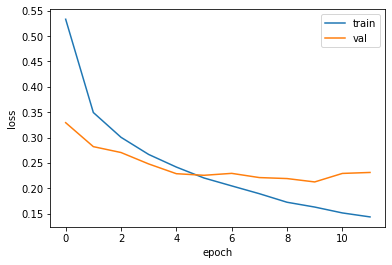

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [11]:
model.evaluate(val_scaled,val_target) # 세트에 대한 성능 평가 => 10번째 에포크의 출력과 동일

375/375 [==============================] - 5s 13ms/step - loss: 0.2126 - accuracy: 0.9234


[0.21261389553546906, 0.9234166741371155]

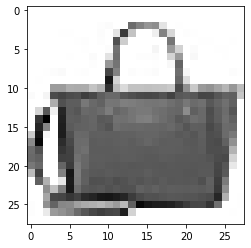

In [12]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)
# 9번째 클래스만 1

[[2.3218842e-18 3.0072564e-23 6.3081982e-23 1.3645734e-20 2.7862024e-18
  5.4943166e-19 1.6818364e-22 5.1220425e-21 1.0000000e+00 2.9620769e-17]]


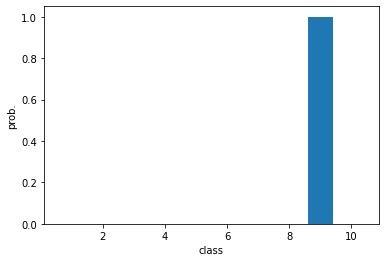

In [14]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [16]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 4s 14ms/step - loss: 0.2389 - accuracy: 0.9193


[0.23888610303401947, 0.9193000197410583]

## visualize

In [18]:
# 가중치 시각화
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')
model.layers

In [19]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 가중치와 절편 크기 출력

(3, 3, 1, 32) (32,)


In [20]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std()) # 첫번째 합성곱 층의 가중치(훈련한 가중치)

-0.0124307675 0.2451451


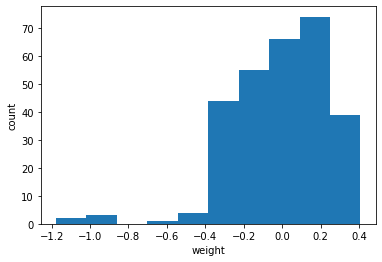

In [21]:
# 가중치 분포도
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 0을 중심으로 종 모양 분포

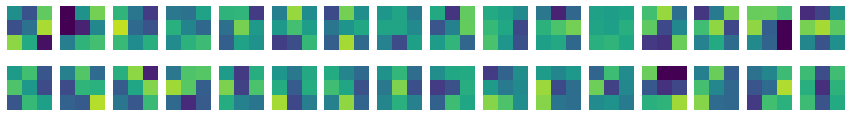

In [22]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5) # 32개 가중치 저장
    axs[i,j].axis('off')
plt.show()

In [26]:
no_training_model = keras.Sequential() # 훈련하지 않은 빈 합성곱 신경망 생성
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [27]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [28]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std()) # 표준편차가 더 작음

-0.009361368 0.08181026


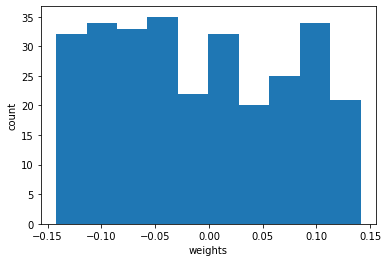

In [29]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

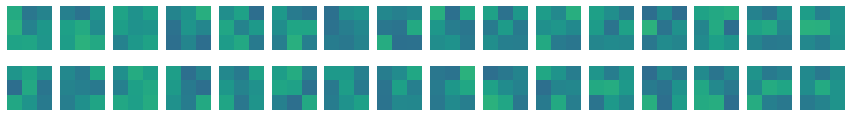

In [30]:
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')

plt.show()

In [33]:
conv_acti = keras.Model(model.input,model.layers[0].output) # 함수형 API 생성

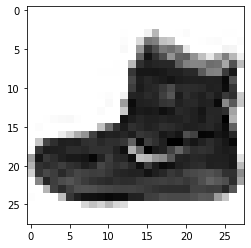

In [32]:
# 특성 맵 시각화
(train_input,train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [36]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)

In [38]:
print(feature_maps.shape) # 첫번째 차원은 배치 차원

(1, 28, 28, 32)


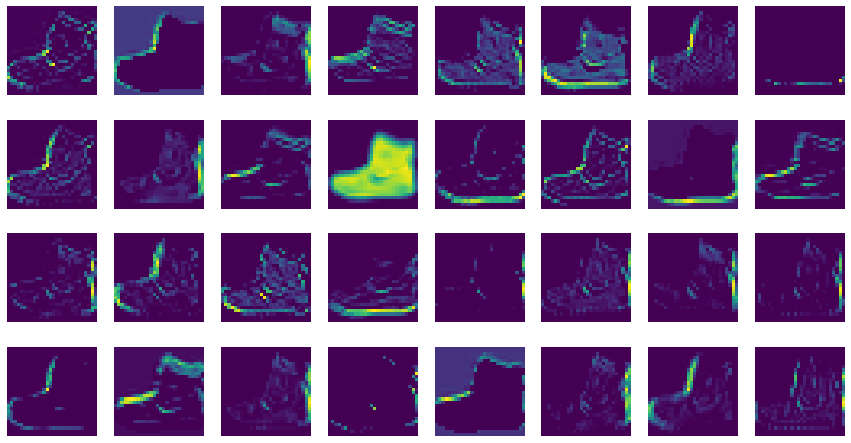

In [39]:
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()